In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
#data_loading and data_setting
boston = load_boston()
X = boston.data
y = boston.target
 

In [4]:
pd.DataFrame(X, columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
# 切片の追加
seg = np.ones((506, 1))
X = np.c_[seg, X]

In [6]:
X_t = X.T
# beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_t, X)), X_t), data_y)
beta_hat = (np.linalg.inv(X_t@X)@X_t)@y

In [7]:
# 回帰係数の値
# 切片
seg_value = beta_hat.T[0]
# 説明変数
coef_value = beta_hat.T[1:]

In [8]:
# yの推定値
#y_hat = seg_value + np.dot( boston.data, coef_value)
y_hat = X@beta_hat

(array([  1.,   6.,  21.,  56., 116., 136.,  76.,  58.,  25.,  11.]),
 array([-4.28131071,  0.6141287 ,  5.50956811, 10.40500752, 15.30044693,
        20.19588634, 25.09132575, 29.98676516, 34.88220457, 39.77764398,
        44.67308339]),
 <a list of 10 Patch objects>)

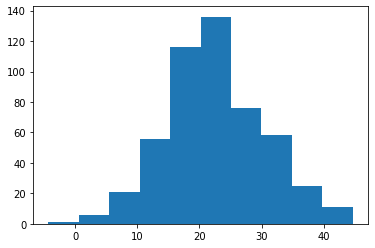

In [9]:
plt.hist(y_hat)

In [10]:
# t値の計算
ss_e =np.sum((y - y_hat) **2)

ss_e = ss_e / (X.shape[0] - X.shape[1] -1 ) #n-p-1(n:データの数, p：説明変数の数)

In [11]:
X_tmp = X-X.mean()
ss_ij = np.linalg.inv(X_tmp.T@X_tmp)

In [12]:
std_err = np.sqrt(np.diagonal(ss_e * ss_ij))

In [13]:
std_err

array([4.04444814e+00, 3.28984446e-02, 1.37414335e-02, 6.15582800e-02,
       8.62456682e-01, 3.82363152e+00, 4.18350623e-01, 1.32232271e-02,
       1.99657742e-01, 6.64139685e-02, 3.76436397e-03, 1.30959913e-01,
       2.68869875e-03, 5.07668968e-02])

In [14]:
t = beta_hat / std_err
t

array([  9.01470043,  -3.28317522,   3.37813797,   0.33397012,
         3.11521016,  -4.64652809,   9.10687112,   0.05234915,
        -7.39048148,   4.60820948,  -3.2766741 ,  -7.27510587,
         3.4632676 , -10.33662506])

# 確認

### statsmodels

In [21]:
import statsmodels.api as sm
  
model = sm.OLS(y, sm.add_constant(boston.data))
result = model.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 01 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        17:54:39   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
x1            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x2             0.0464      0.014      3.382      0.001       0.019       0.073
x3             0.0206      0.061      0.334      0.738      -0.100       0.141
x4             2.6867      0.862      3.118      0.002       0.994       4.380
x5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x6             3.8099      0.418      9.116      0.000       2.989       4.631
x7             0.0007      0.013      0.052      0.958      -0.025       0.027
x8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x9             0.3060      0.066      4.613      0.000       0.176       0.436
x10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x12            0.0093      0.003      3.467      0.001       0.004       0.015
x13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
result.aic

3025.608594075548

### sklearn

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
coef_ = lr.coef_
y_pred = lr.predict(X)

In [34]:
from sklearn.metrics import mean_squared_error
# calculate the error
mse = mean_squared_error(y, y_pred)
print('MSE: %.3f' % mse)

MSE: 21.895


In [41]:
# aic自作
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic

calculate_aic(len(y), mse, len(lr.coef_) + 1)

1591.6427984724191

In [55]:
n= len(y)
resid = y - y_pred
sse = sum(resid**2) / n



n*np.log(2*np.pi) +n * np.log(sse) + 2 * (len(lr.coef_) + 1)

2521.6085940755484

In [47]:
sse =  np.sum((y - y_hat) **2, axis=0)
sse = sse / (X.shape[0] - X.shape[1] -1 )
 
s = np.linalg.inv(np.dot(X.T, X))
 
std_err = np.sqrt(np.diagonal(sse * s))
 
print("std_err : ", std_err)

std_err :  [5.10865317e+00 3.28984446e-02 1.37414335e-02 6.15582800e-02
 8.62456682e-01 3.82363149e+00 4.18350623e-01 1.32232271e-02
 1.99657742e-01 6.64139685e-02 3.76436397e-03 1.30959913e-01
 2.68869875e-03 5.07668968e-02]


In [36]:
t1 = coef_ / std_err
 
print("t : ", t1)

t :  [  0.          -3.28317522   3.37813797   0.33397012   3.11521016
  -4.64652812   9.10687112   0.05234915  -7.39048148   4.60820948
  -3.2766741   -7.27510587   3.4632676  -10.33662506]


### p値

In [37]:
from scipy import stats
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(X)-len(X[0])))) for i in t]
pd.DataFrame(np.round(p_values, 3))

,0
0,0.000
1,0.001
2,0.001
3,0.739
4,0.002
5,0.000
6,0.000
7,0.958
8,0.000
9,0.000


In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 31 Dec 2020   Prob (F-statistic):          6.72e-135
Time:                        17:09:20   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
x1            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x2             0.0464      0.014      3.382      0.001       0.019       0.073
x3             0.0206      0.061      0.334      0.738      -0.100       0.141
x4             2.6867      0.862      3.118      0.002       0.994       4.380
x5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x6             3.8099      0.418      9.116      0.000       2.989       4.631
x7             0.0007      0.013      0.052      0.958      -0.025       0.027
x8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x9             0.3060      0.066      4.613      0.000       0.176       0.436
x10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x12            0.0093      0.003      3.467      0.001       0.004       0.015
x13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### yの予測値

In [40]:
print(np.mean(y_pred))
print(np.mean(y_hat))
print(np.mean(X@beta_hat))

22.532806324110663
22.532806324110663
22.532806324107526


### aic手計算

In [88]:
n = len(X)
resid = y - y_hat
sse = sum(resid ** 2)
sigma_hat = (1/n)*sse

likelihood= (-n/2)*np.log(2*np.pi*sigma_hat) - (1/(2*sigma_hat))*sse
likelihood

-1498.8042970377742

In [89]:
aic = -2* likelihood+ 2 *(k+1)
aic

3025.6085940755484

In [90]:
result.aic

3025.608594075548

### 決定係数

In [91]:
y_var = y.mean()

R_score = np.sum((y_hat-y_var)**2) /  np.sum((y-y_var)**2) 
R_score

0.7406426641094076

In [92]:
from sklearn.metrics import r2_score
r2_score(y, y_hat)

0.7406426641094094

In [58]:
from scipy import stats
import numpy as np

length=[3, 2, 4, 2, 2, 1, 4, 2, 10, 4, 3, 4, 4, 3, 3, 9, 9, 3, 4, 3, 9, 4, 5, 9, 7, 7, 3, 7]

mu = np.mean(length)
logL_poisson = np.sum(stats.poisson.logpmf(length, mu=mu))
aic_poisson = -2*logL_poisson + 2*1
print('AIC(POISSON)=',aic_poisson)

AIC(POISSON)= 131.2861758044045


In [69]:
params_norm = stats.norm.fit(X @ beta_hat)
logL_norm = np.sum( stats.norm.logpdf(X @ beta_hat, loc=params_norm[0], scale=params_norm[1]) )
aic_norm = -2*logL_norm + 2*(len(beta_hat)+1)
print('AIC(NORMAL)=',aic_norm)

AIC(NORMAL)= 3558.560207123968


In [60]:
stats.norm.fit(X)

(65.1401122557877, 141.0020536475136)